In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('used cars.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
print('The Shape of the dataset is ',data.shape)

The Shape of the dataset is  (7253, 14)


In [5]:
print('The Columns of the dataset are ',data.columns)

The Columns of the dataset are  Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
print('The number of duplicated rows in the dataset are ',data.duplicated().sum())

The number of duplicated rows in the dataset are  0


In [8]:
data.nunique().to_frame('Unique Values')

,Unique Values
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


## Detecting Missing values

In [9]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
data.isnull().mean()*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

## Data Reduction

In [11]:
data=data.drop('S.No.',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


## Feature Engineering

In [12]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


Since car names will not be great predictors of the price in our current data. But we can process this column to extract important information using brand and Model names. Let’s split the name and introduce new variables “Brand” and “Model”

In [13]:
data['Brand'] = data.Name.str.split().str.get(0)

In [14]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [15]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [16]:
data['Mileage']=data['Mileage'].str.replace('km/kg','').str.replace('kmpl','').astype(float)

In [17]:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

83

In [18]:
data['Mileage'].fillna(value=np.mean(data['Mileage']),inplace=True)

In [20]:
data['Engine']=data['Engine'].astype(str).str.replace('CC','').astype(float)

In [21]:
def convert_to_lakh(value):
    if isinstance(value, float):
        # If the value is already a float, return it as is
        return value
    elif 'Cr' in value:
        num = float(value.replace(' Cr', ''))
        return num * 100  # 1 crore = 100 lakh
    elif 'Lakh' in value:
        num = float(value.replace(' Lakh', ''))
        return num
    else:
        return value

In [22]:
data['New_Price'] = data['New_Price'].apply(convert_to_lakh)

In [23]:
data['Power'] = data['Power'].replace('null', np.nan)

In [24]:
data['Power'] = data['Power'].str.replace(' bhp', '')

In [25]:
data['Power'] = pd.to_numeric(data['Power'], errors='coerce')

In [45]:
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
data['Seats']=data['Seats'].fillna(data['Seats'].median())
data['Engine']=data['Engine'].fillna(data['Engine'].median())
data['Power']=data['Power'].fillna(data['Power'].median())

In [46]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6247
Price                1234
Car_Age                 0
Brand                   0
Model                   1
dtype: int64

## Data Wrangling/Cleaning

In [26]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [27]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.700000,2179.0,187.70,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,18.346527,2179.0,115.00,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.600000,1998.0,112.00,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.700000,2179.0,187.70,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.820000,1998.0,189.08,4.0,44.28,35.67,7,Mini,CooperConvertible


In [28]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

* EDA can be leveraged to check for outliers, patterns, and trends in the given data.
* EDA helps to find meaningful patterns in data.
* EDA provides in-depth insights into the data sets to solve our business problems.
* EDA gives a clue to impute missing values in the dataset 

## Statistics Summary

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [47]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,1006.000000,6019.000000,7253.000000
mean,2013.365366,10.761010,18.346527,1615.980284,112.148659,5.278230,2.777358,2.018429,10.634634
std,3.254421,0.716276,4.134048,594.041263,53.200787,0.809531,0.813769,0.748221,3.254421
min,1996.000000,5.147494,6.400000,72.000000,34.200000,0.000000,1.591274,0.364643,5.000000
25%,2011.000000,10.434145,15.400000,1198.000000,74.900000,5.000000,2.184364,1.504077,8.000000
50%,2014.000000,10.885884,18.346527,1493.000000,93.700000,5.000000,2.531313,1.893112,10.000000
75%,2016.000000,11.198228,21.100000,1968.000000,138.030000,5.000000,3.297390,2.393339,13.000000
max,2019.000000,15.687313,33.540000,5998.000000,616.000000,10.000000,5.929589,5.081404,28.000000


From the statistics summary, we can infer the below findings :

* Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
* On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
* Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.
* It looks like Engine and Power have outliers, and the data is right-skewed.
* The average number of seats in a car is 5. car seat is an important feature in price contribution.
* The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.


In [48]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price', 'Car_Age']


# Detecting Skewness and Outliers

Year
Skew : -0.84


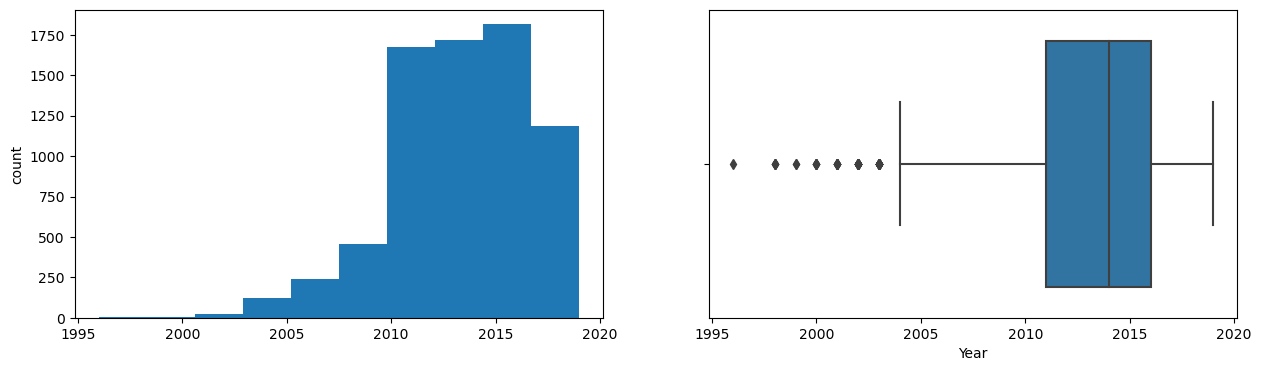

Kilometers_Driven
Skew : -1.3


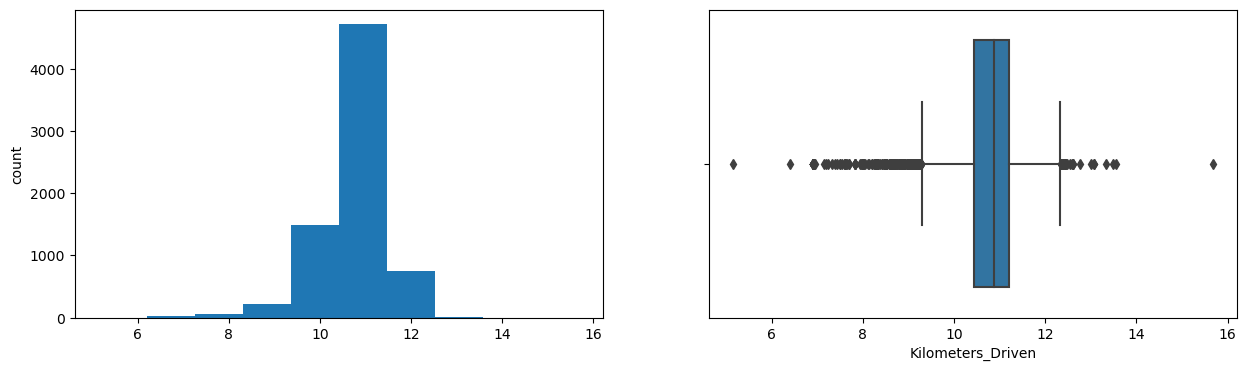

Mileage
Skew : 0.21


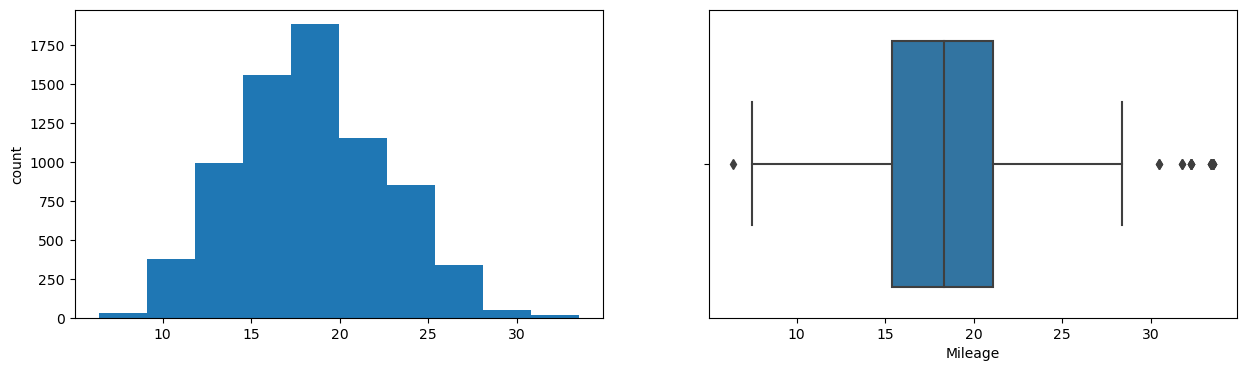

Engine
Skew : 1.41


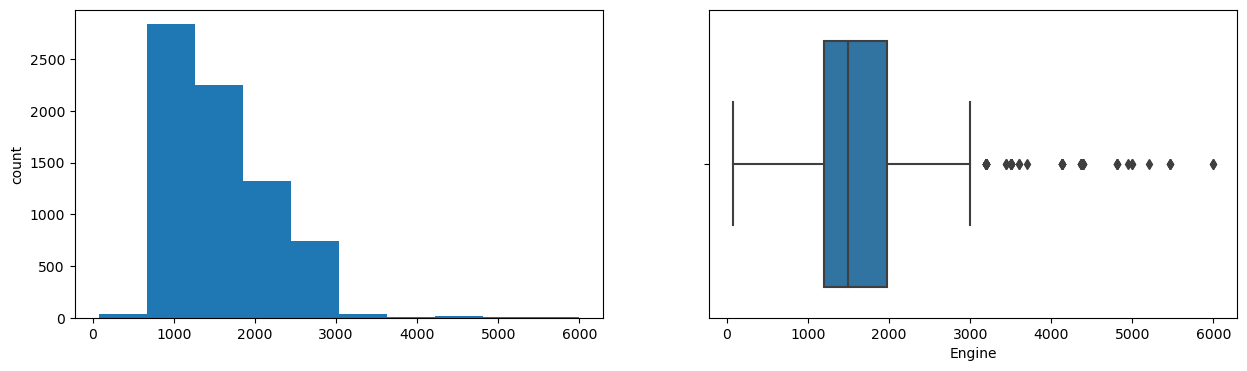

Power
Skew : 1.98


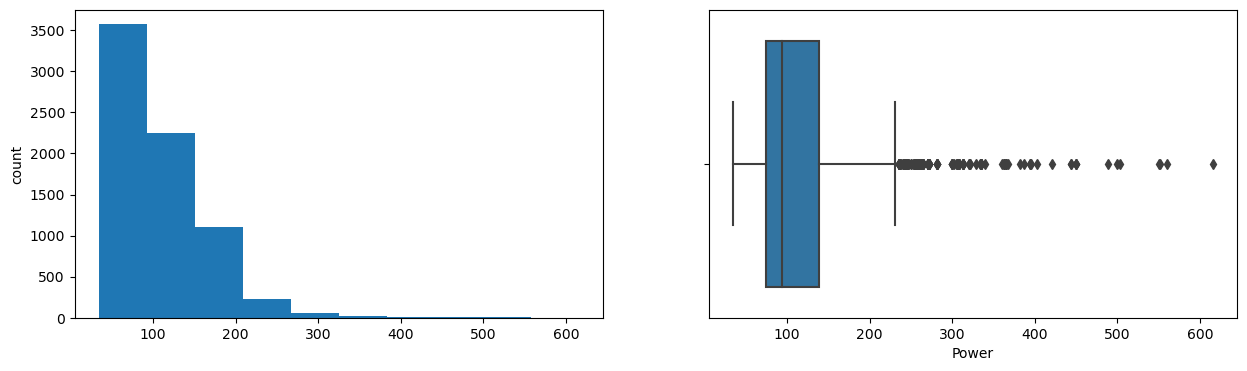

Seats
Skew : 1.91


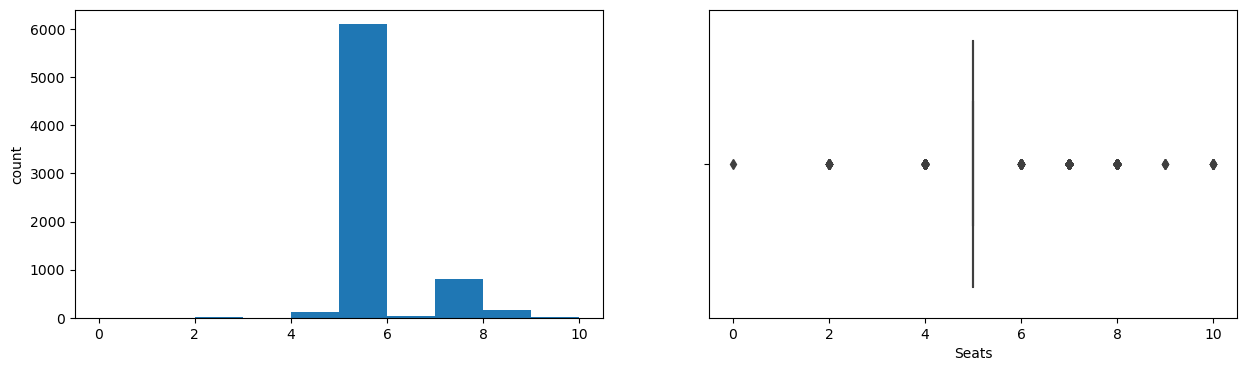

New_Price
Skew : 0.8


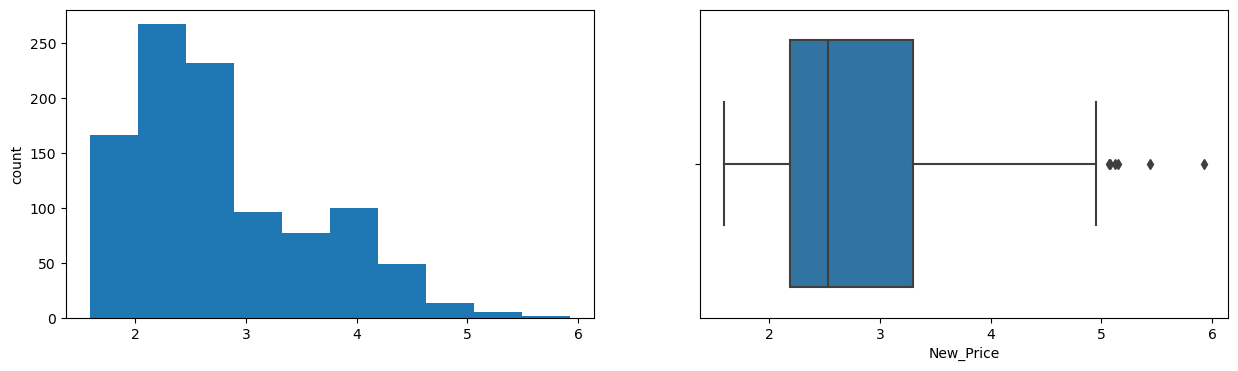

Price
Skew : 0.75


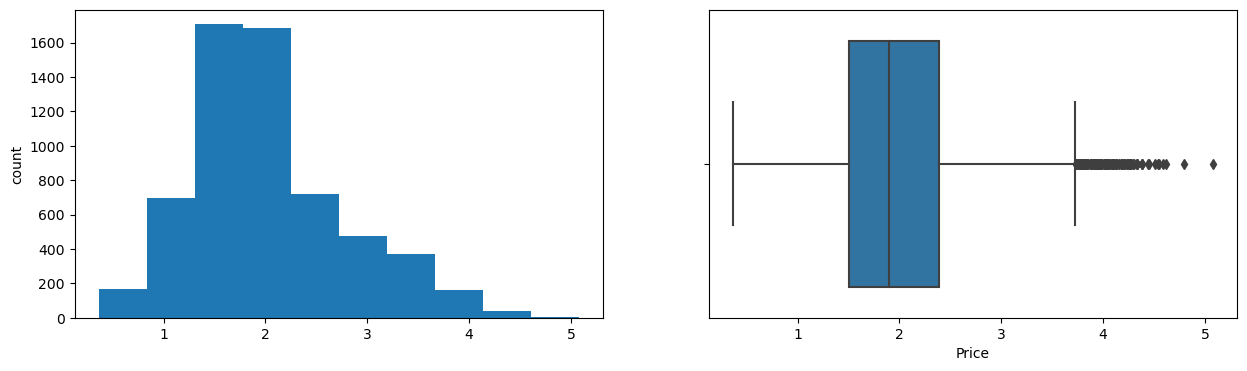

Car_Age
Skew : 0.84


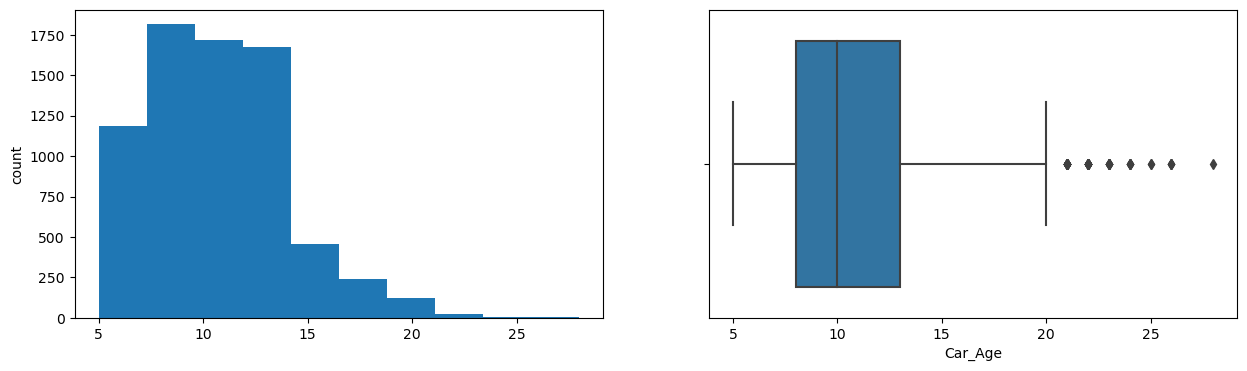

In [49]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Price and Kilometers Driven are right skewed for this data to be transformed, and all outliers will be handled during imputation

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

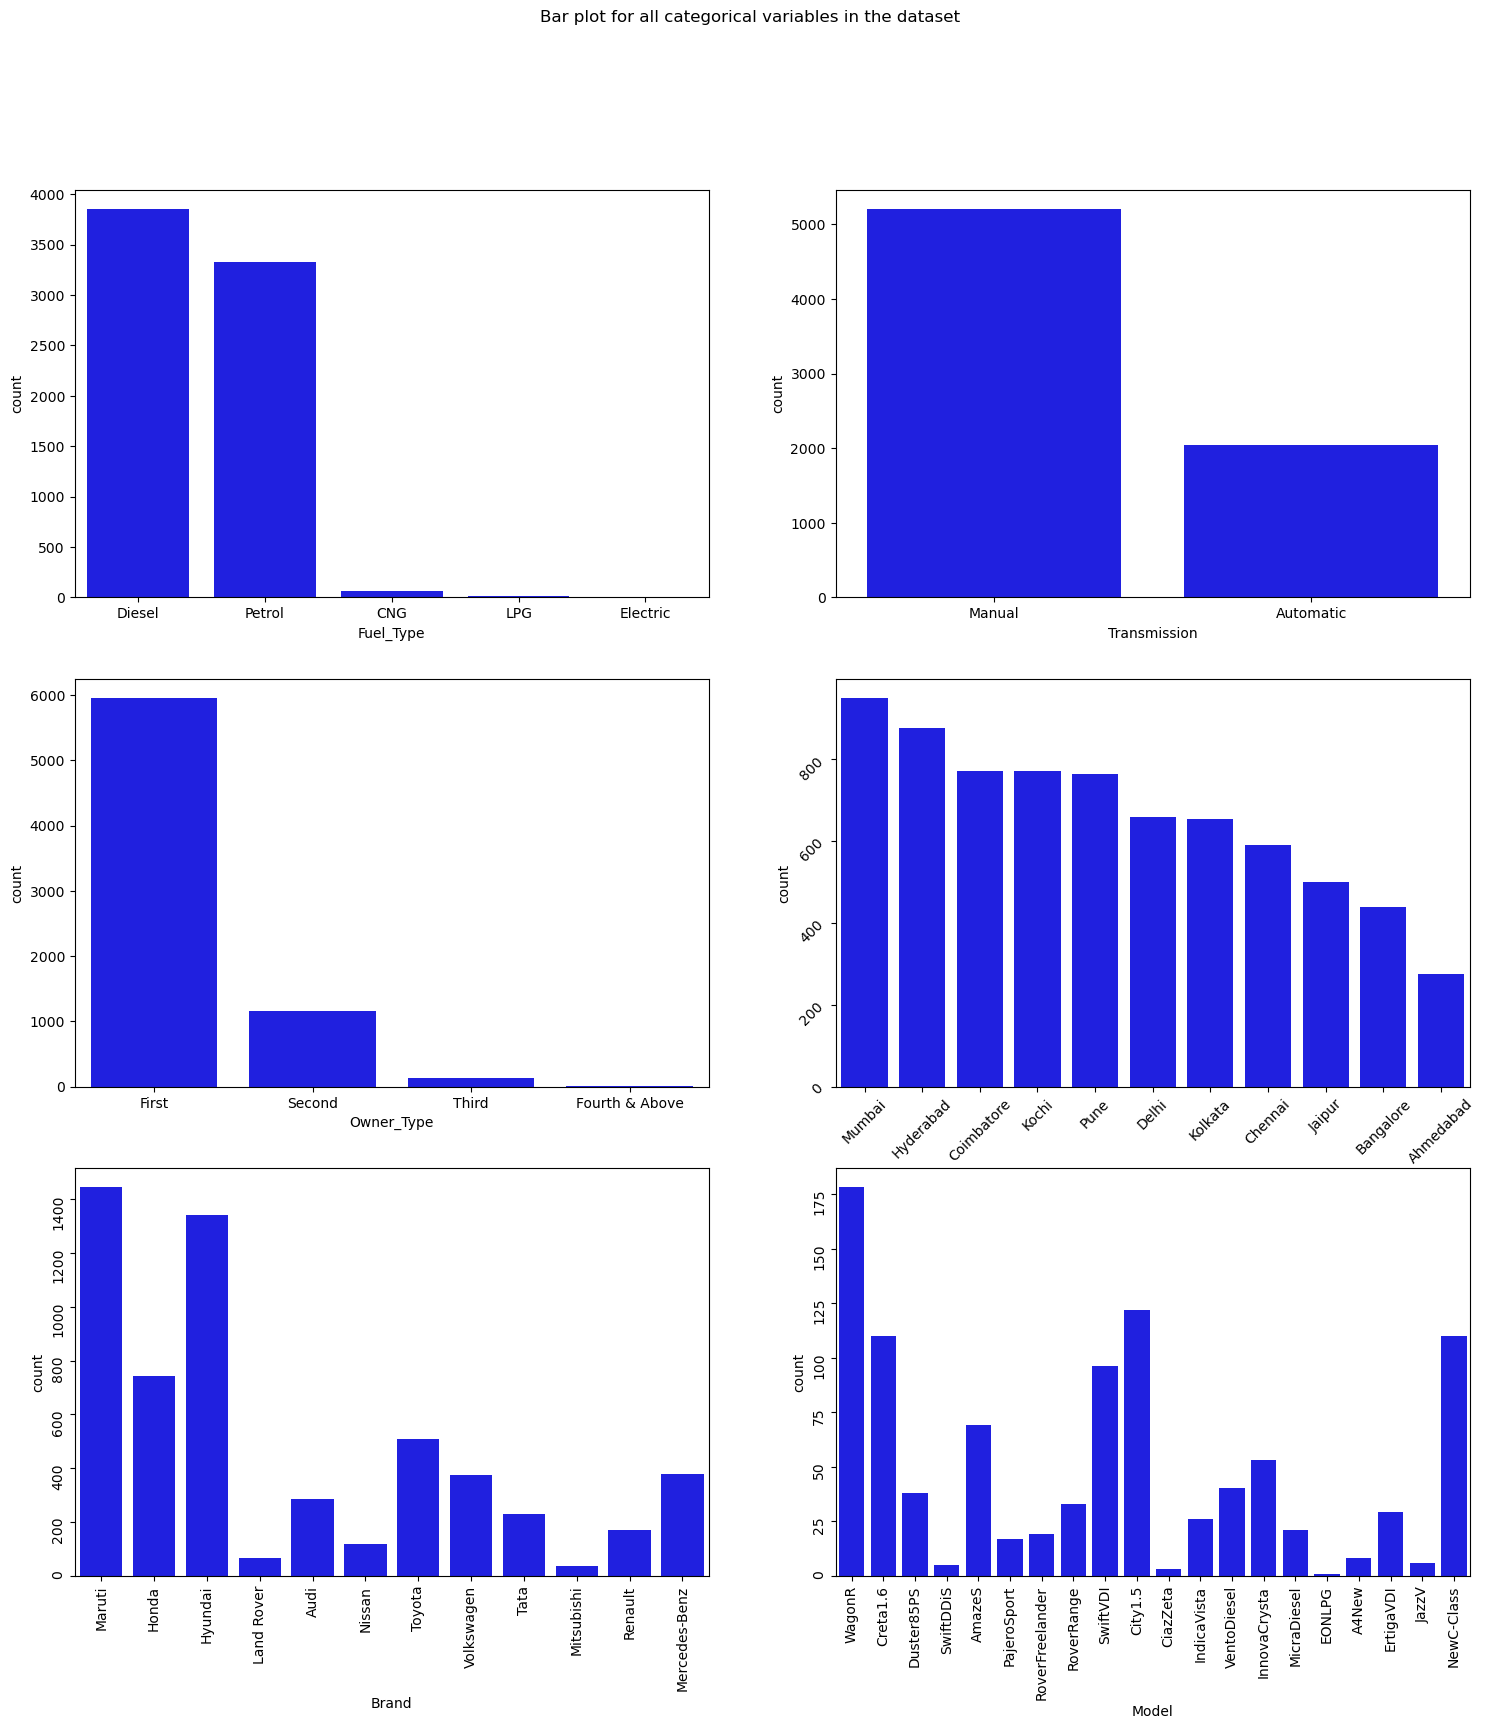

In [50]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue', 
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue', 
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue', 
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue', 
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

From the count plot, we can have below observations

* Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
* ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
* ~72% of cars have manual transmission
* ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
* ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
* WagonR ranks first among all models which are available for purchase

Price and Kilometer-Driven variables are highly skewed and on a larger scale. Let’s do log transformation.

Log transformation can help in normalization, so this variable can maintain standard scale with other variables:

In [33]:
data.skew()

Year                 -0.839816
Kilometers_Driven    61.582575
Mileage               0.206338
Engine                1.412413
Power                 1.961178
Seats                 1.902262
New_Price             4.128300
Price                 3.335232
Car_Age               0.839816
dtype: float64

In [36]:
column=['Kilometers_Driven','Price','New_Price']
for col in column:
    if data.skew().loc[col]>1:
        data[col]=np.log1p(data[col])

<Figure size 1300x1700 with 0 Axes>

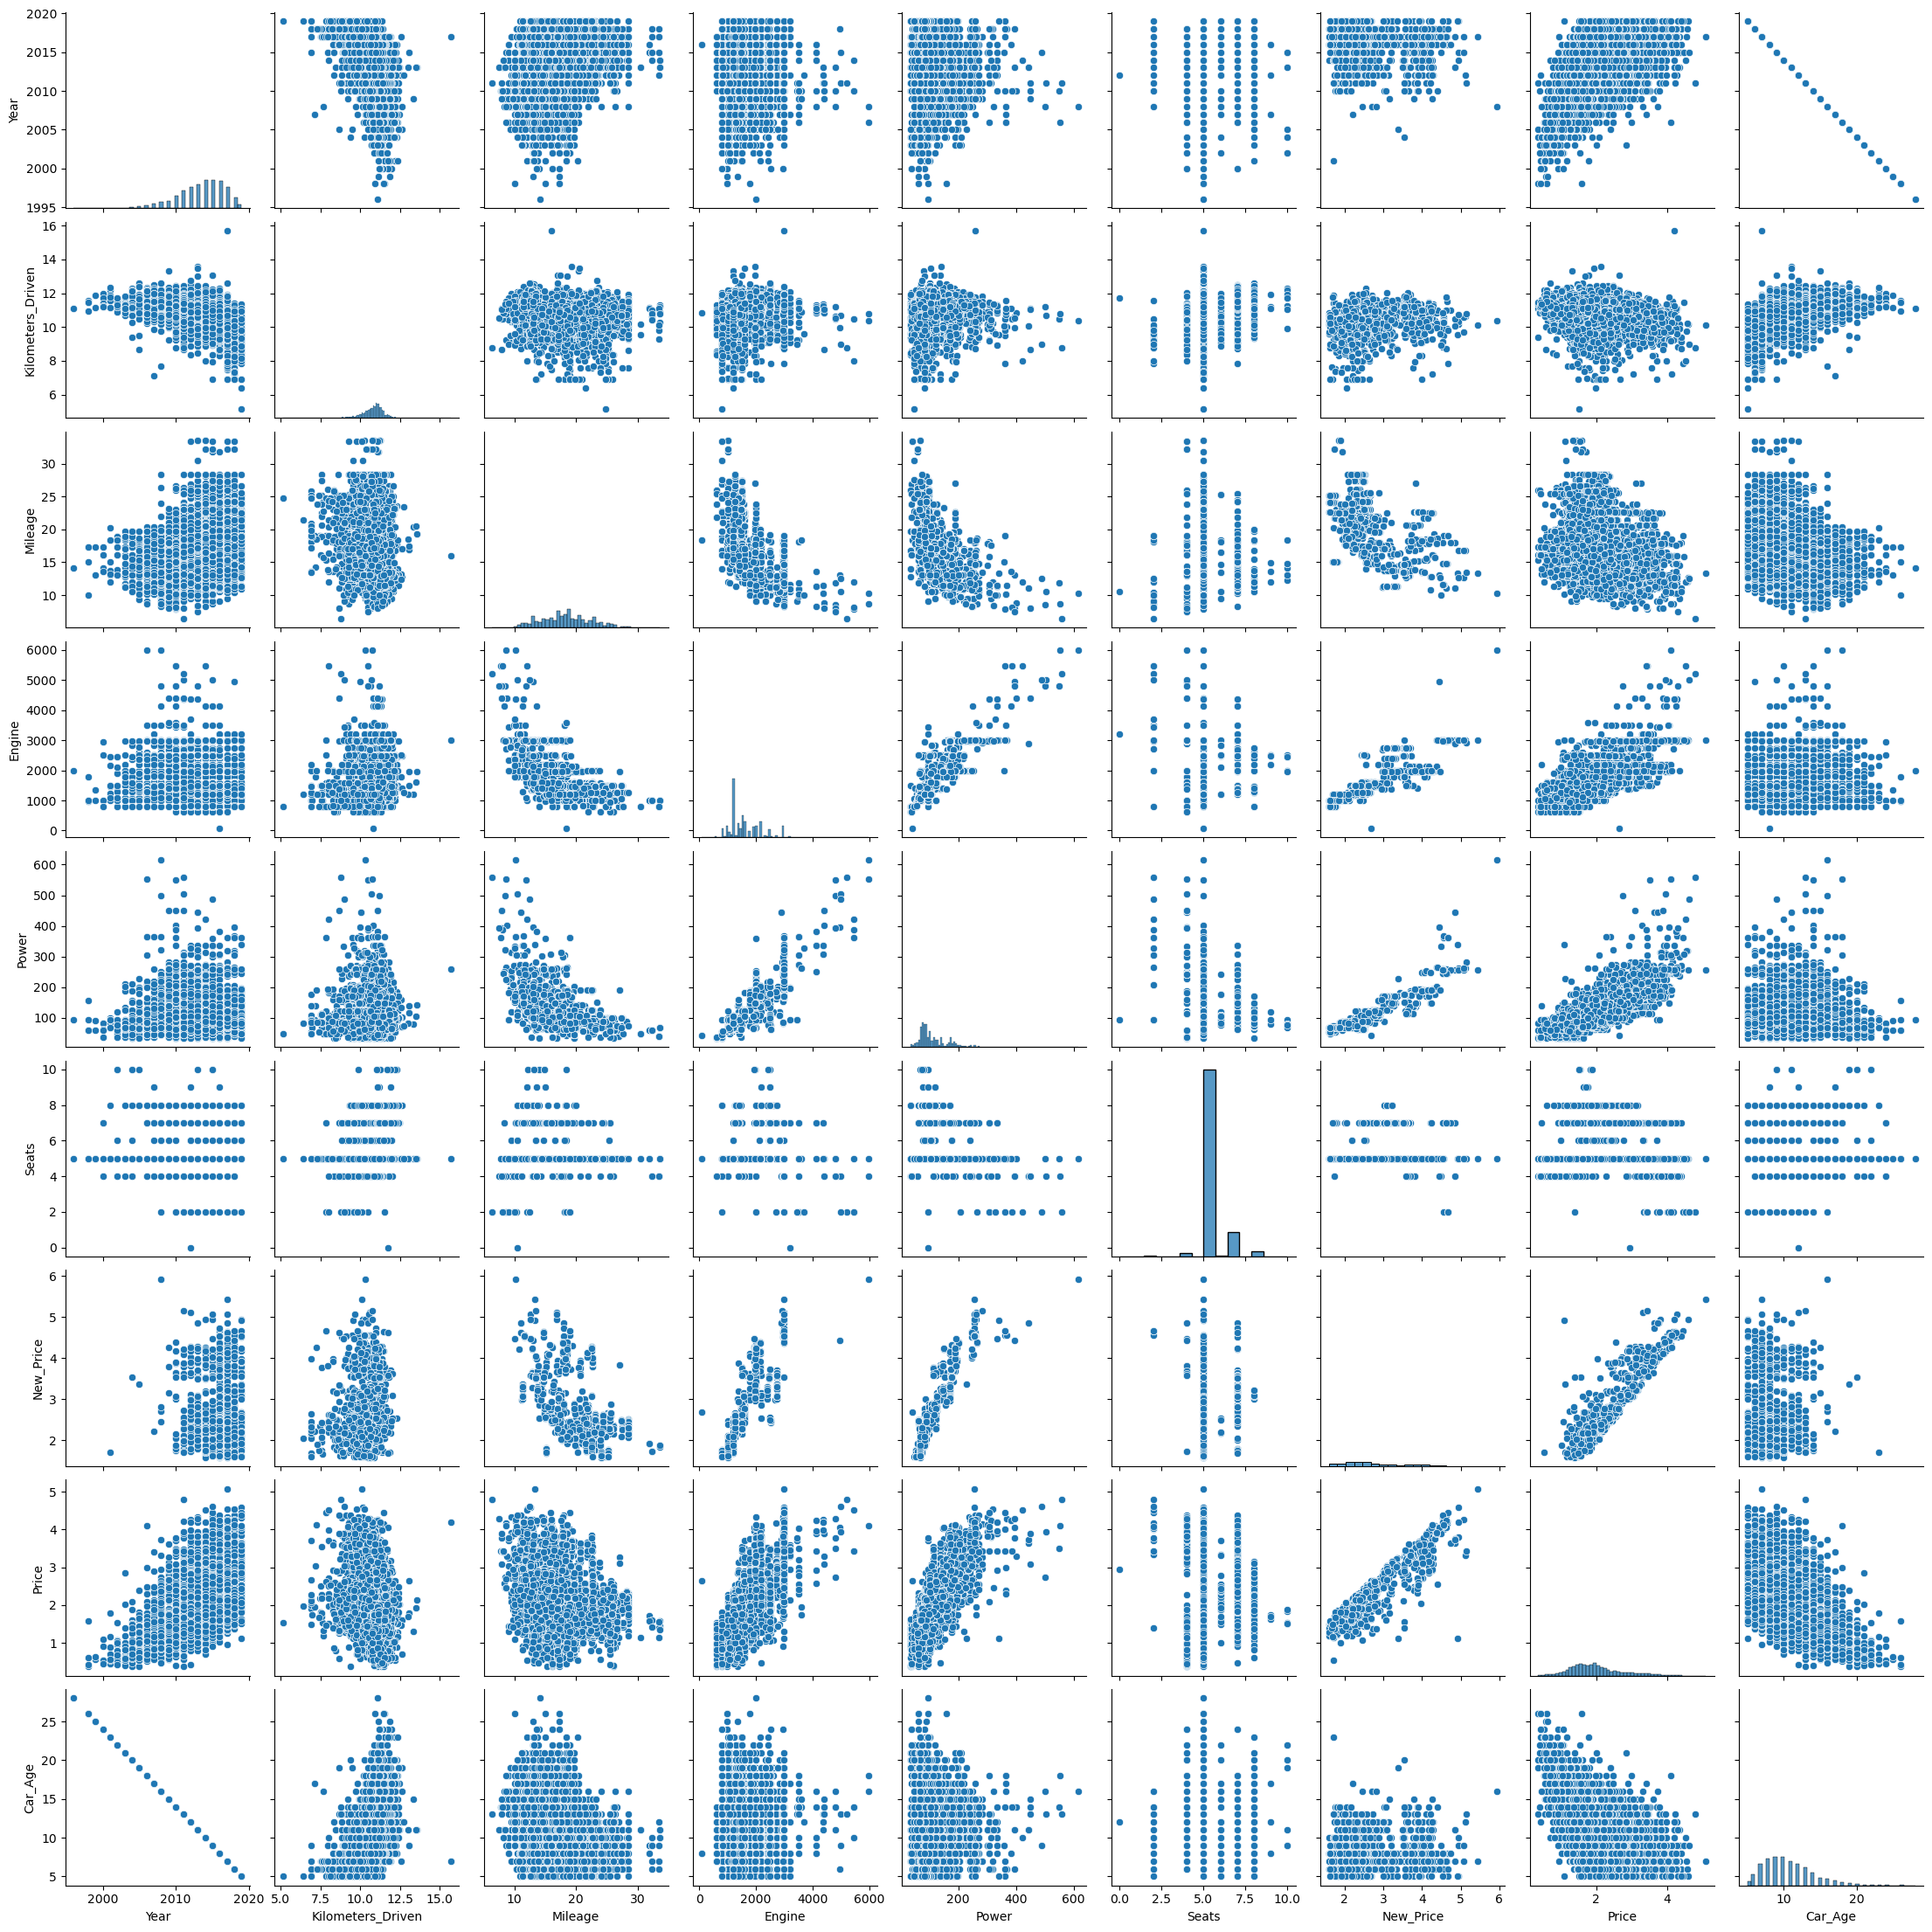

In [51]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data)
plt.show()

Pair Plot provides below insights:

* The variable Year has a positive correlation with price and mileage
* A year has a Negative correlation with kilometers-Driven
* Mileage is negatively correlated with Power
* As power increases, mileage decreases
* Car with recent make is higher at prices. As the age of the car increases price decreases
* Engine and Power increase, and the price of the car increases

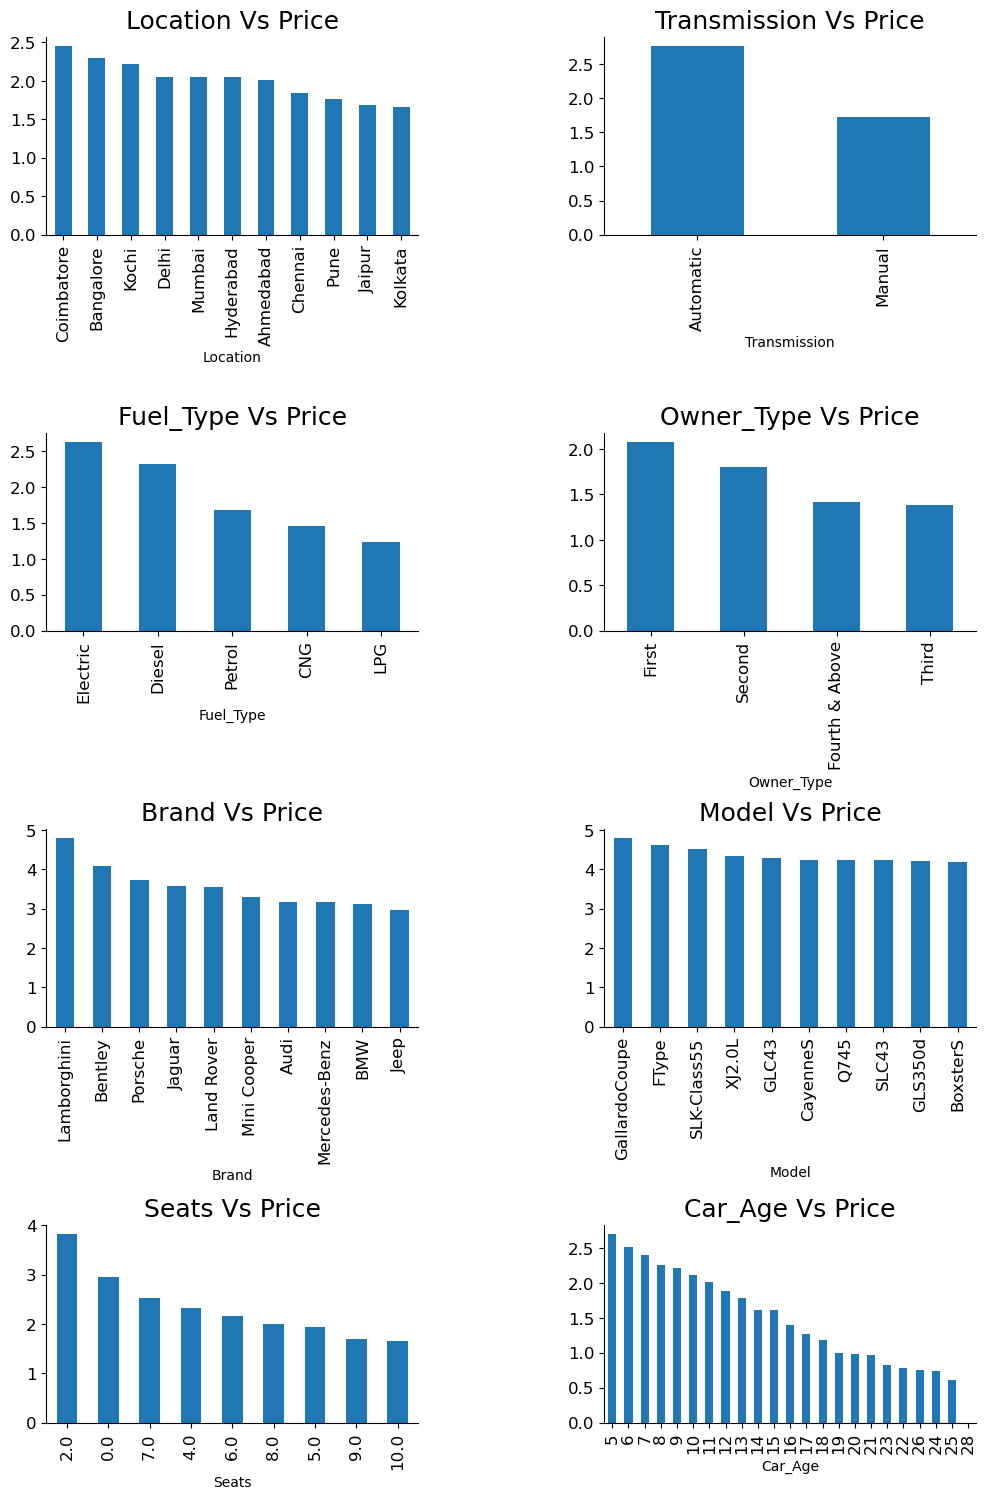

In [52]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

Observations
* The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
* Automatic cars have more price than manual cars.
* Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
* First-owner cars are higher in price, followed by a second
* The third owner’s price is lesser than the Fourth and above
* Lamborghini brand is the highest in price
* Gallardocoupe Model is the highest in price
* 2 Seater has the highest price followed by 7 Seater
* The latest model cars are high in price

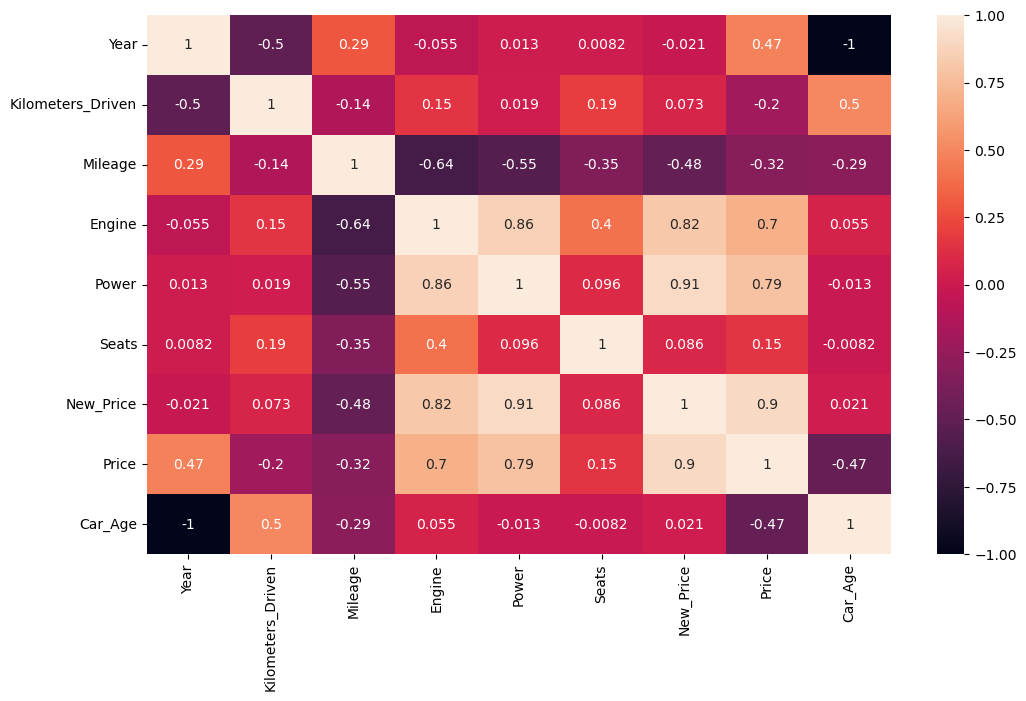

In [40]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

From the Heat map, we can infer the following:
* The engine has a strong positive correlation to Power 0.86
* Price has a positive correlation to Engine 0.69 as well Power 0.77
* Mileage has correlated to Engine, Power, and Price negatively
* Price is moderately positive in correlation to year.
* Kilometer driven has a negative correlation to year not much impact on the price
* Car age has a negative correlation with Price
* car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase of car has a negative correlation with Mileage this makes sense